# Exercise 6 - Support Vector machines

In [14]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as si
from sklearn.svm import SVC
from sklearn import svm #SVM software
from collections import OrderedDict
from scipy.io import loadmat
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline


### Import Data

In [47]:
data = loadmat('ex6data1.mat')
#Training set
X = data['X'] 
y = data['y']

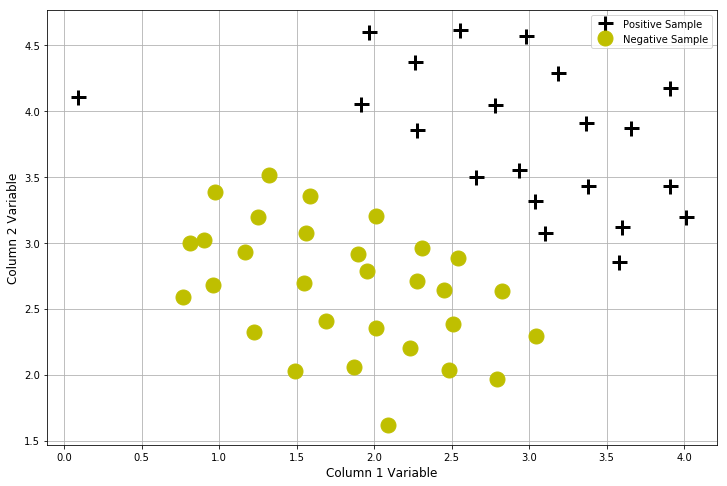

In [51]:
def plotData(X, y):
    
    """Plots the data points X and y into a new figure """
    
    y = y.flatten()
    #Divide the sample into two: ones with positive classification, one with null classification
    pos = y==1
    neg = y==0
    
    
    plt.plot(X[:,0][pos], X[:,1][pos], "k+",label = 'Positive Sample', markersize=15, mew=3)
    plt.plot(X[:,0][neg], X[:,1][neg], "yo",label = 'Negative Sample',markersize=15)
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure(figsize = (12,8))
plotData(X,y)

In [58]:
def visualizeBoundaryLinear(X, y, model):
    """Plots a linear decision boundary learned by the SVM"""
    
    plt.figure(figsize = (12,8))
    w = model.coef_[0]
    b = model.intercept_[0]
    xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yp = - (w[0] * xp + b) / w[1]

    plt.plot(xp, yp, 'b-')    
    plotData(X, y)

    
def svmTrain(X, y, C, kernelFunction, tol=1e-3, max_passes = -1, sigma = 0.1):
    """Trains an SVM classifier"""
    
    y = y.flatten()

    if kernelFunction == "gaussian_rbf":
        clf = svm.SVC(C = C, kernel="precomputed", tol = tol, max_iter=max_passes, verbose=2)
        return clf.fit(gaussianKernelGramMatrix(X,X, sigma=sigma), y)
    
    else: 
        clf = svm.SVC(C = C, kernel=kernelFunction, tol=tol, max_iter=max_passes, verbose=2)
        return clf.fit(X, y)

Cost Function with standard Regularised Logistic Regression:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\Bigg[y^{(i)}\big(-logh_{\theta}(x^{(i)})\big) + (1-y^{(i)})\big((-log(1-h_{\theta}(x^{(i)}))\big)\Bigg] + \frac{\lambda}{2}\sum^{n}_{i=1}\theta^{2m}_{j}$$

Cost Function with regularised SVM:

$$J(\theta) = C\sum_{i=1}^{m}\Bigg[y^{(i)}cost_1(\theta^Tx^{(i)}) + (1-y^{(i)})cost_0(\theta^Tx^{(i)})\Bigg] + \frac{1}{2}\sum^{n}_{i=1}\theta^{2}_{j}$$

where $C = \frac{1}{\lambda}$

Gaussian Kernel:
$$f_i = simularity(x,l^{(i)}) = exp\Bigg(-\frac{\sum_{j-1}^{n}(x_j - l^{(i)}_{j})^2}{2\sigma^2}\Bigg)$$
$$f_1 = exp\Bigg(-\frac{||x-l^{(1)}||^2}{2\sigma^2}\Bigg)$$



[LibSVM]

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


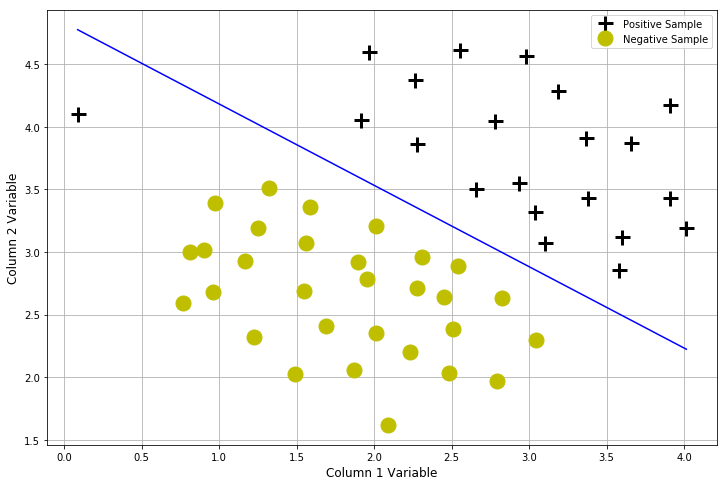

In [59]:
# train SVM with different C values with a linear Kernel
C = 1
model = svmTrain(X, y, C, "linear", 1e-3, 20)
visualizeBoundaryLinear(X, y, model)


### SVM with Gaussian Kernels

### Example 3